[*********************100%%**********************]  5 of 5 completed
/var/folders/j1/75z7rb151yjd4wx7mng3z3fm0000gn/T/ipykernel_46041/408787910.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = yf.download(tickers, start=start_date, end=end_date)['Adj Close'].fillna(method='ffill')


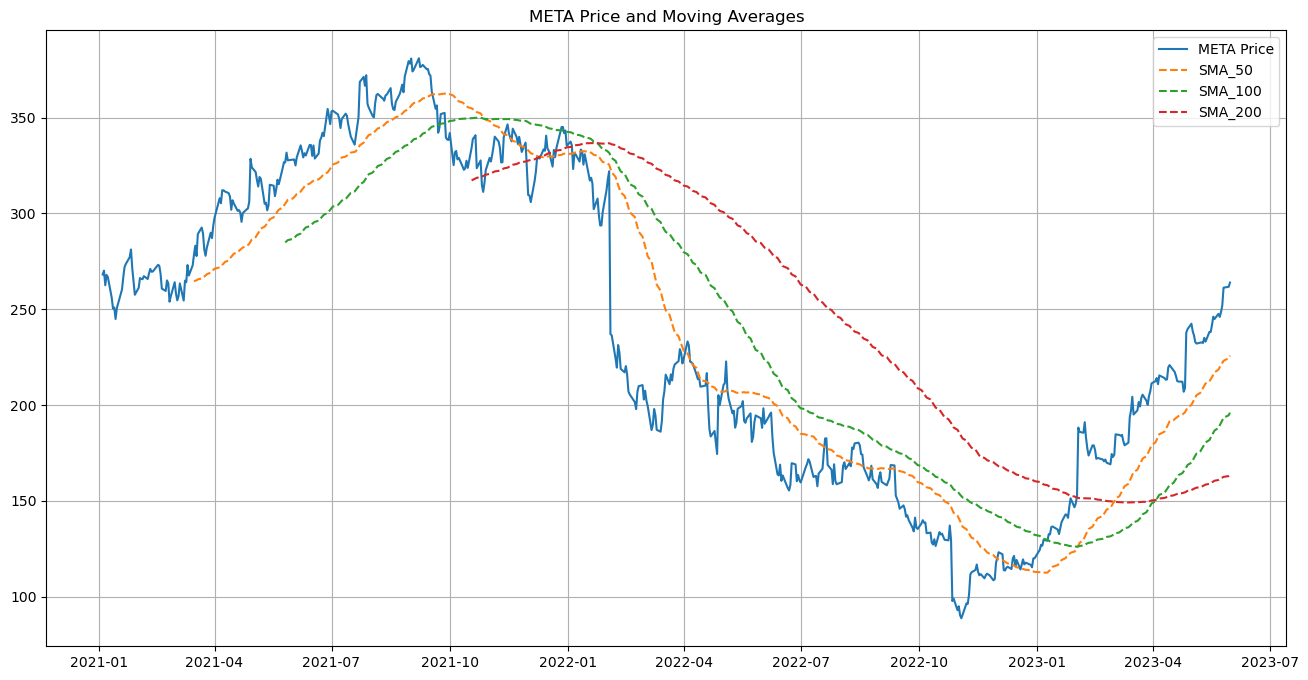

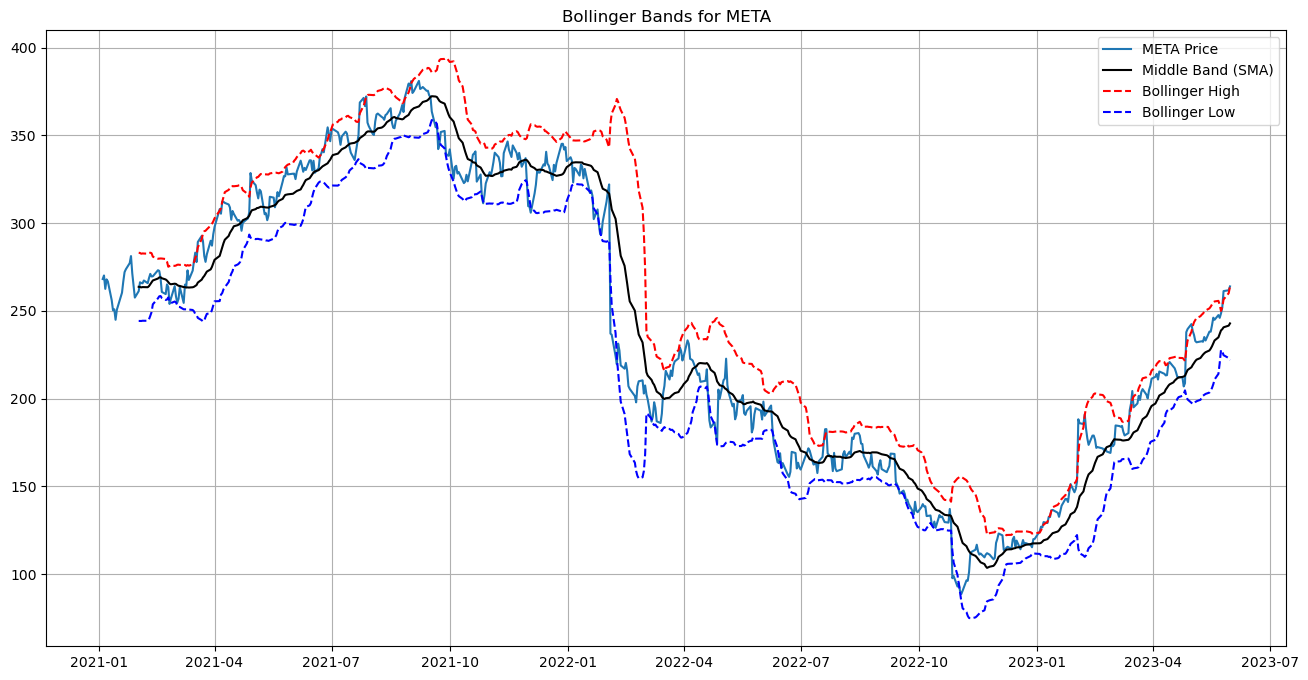

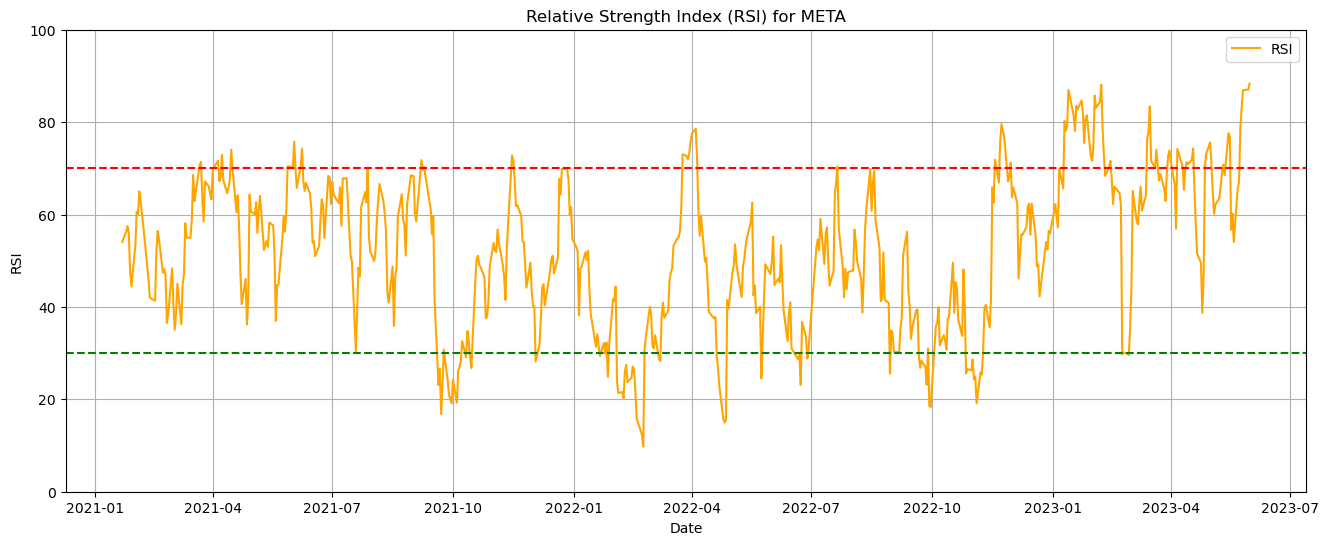

In [68]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the date range for data retrieval
start_date = "2021-01-01"
end_date = "2023-06-01"

# List of tickers to analyze
tickers = ['META', 'AAPL', 'TSLA', 'MSFT', 'SPY']

# Pull adjusted close price data
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close'].fillna(method='ffill')
data.index = data.index.tz_localize(None)

# Function to calculate Bollinger Bands (with middle band)
def calculate_bollinger_bands(df, window=20, num_std_dev=2):
    rolling_mean = df.rolling(window=window).mean()  # Middle band
    rolling_std = df.rolling(window=window).std()    # Standard deviation
    
    bollinger_high = rolling_mean + (rolling_std * num_std_dev)  # Upper band
    bollinger_low = rolling_mean - (rolling_std * num_std_dev)   # Lower band
    
    return rolling_mean, bollinger_high, bollinger_low  # Return all three bands


# Function to calculate RSI
def calculate_rsi(df, window=14):
    delta = df.diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    
    gain = pd.DataFrame(gain, index=df.index, columns=df.columns).rolling(window=window).mean()
    loss = pd.DataFrame(loss, index=df.index, columns=df.columns).rolling(window=window).mean()
    
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# Function to calculate Simple Moving Averages (SMA)
def calculate_sma(df, windows=[50, 100, 200]):
    sma_dict = {}
    for window in windows:
        sma_dict[f'SMA_{window}'] = df.rolling(window=window).mean()
    return sma_dict

# Function to plot indicators for each ticker, including the middle band
def plot_indicators(ticker_data, sma_data, bollinger_data, rsi_data, ticker):
    # Plot Price and Moving Averages
    plt.figure(figsize=(16, 8), dpi=100)
    plt.plot(ticker_data, label=f'{ticker} Price')
    for sma_label, sma_series in sma_data.items():
        plt.plot(sma_series, label=sma_label, linestyle='--')
    plt.title(f'{ticker} Price and Moving Averages')
    plt.legend()
    plt.grid()
    plt.show()

    # Plotting Bollinger Bands (with middle band)
    plt.figure(figsize=(16, 8), dpi=100)
    plt.plot(ticker_data, label=f'{ticker} Price')
    plt.plot(bollinger_data[0], label='Middle Band (SMA)', linestyle='-', color='black')  # Middle Band
    plt.plot(bollinger_data[1], label='Bollinger High', linestyle='--', color='red')      # Upper Band
    plt.plot(bollinger_data[2], label='Bollinger Low', linestyle='--', color='blue')      # Lower Band
    plt.title(f'Bollinger Bands for {ticker}')
    plt.legend()
    plt.grid()
    plt.show()

    # Plotting RSI
    plt.figure(figsize=(16, 6), dpi=100)
    plt.plot(rsi_data, label='RSI', color='orange')
    plt.axhline(70, linestyle='--', color='red')
    plt.axhline(30, linestyle='--', color='green')
    plt.title(f'Relative Strength Index (RSI) for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.ylim(0, 100)
    plt.legend()
    plt.grid()
    plt.show()

# Process and plot for each ticker individually
def process_and_plot_ticker(ticker):
    # Create a DataFrame for the current ticker
    ticker_data = data[[ticker]].copy()  # Select only the current ticker
    
    # Calculate indicators

    sma_data = calculate_sma(ticker_data)
    bollinger_mean, bollinger_high, bollinger_low = calculate_bollinger_bands(ticker_data)
    rsi_data = calculate_rsi(ticker_data)

    # Plot all indicators
    plot_indicators(ticker_data, sma_data, (bollinger_mean, bollinger_high, bollinger_low), rsi_data, ticker)

#Change the ticker symbol for the stock you want 
process_and_plot_ticker('META')
